##**MATPLOTLIB BASICS**

**1-Practice:** Find a dataframe including two categorical variables and show these variables with a bar plot.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [4]:
df_2 = df.loc[lambda df: df["Age"] < 30, :]
df_3_male = df_2.loc[lambda df_2: df["Sex"] == "male"]
df_3_male_1 = df_3_male.groupby("Survived").count()
male_survival_ratio = df_3_male_1["PassengerId"][1] / (df_3_male_1["PassengerId"][0]+df_3_male_1["PassengerId"][1])
Survival_percentage_male = "{:.0%}".format(male_survival_ratio) 
Survival_percentage_male = int(Survival_percentage_male.replace("%",""))


In [5]:
df_3_female = df_2.loc[lambda df_2: df["Sex"] == "female"]
df_3_female_1 = df_3_female.groupby("Survived").count()
female_survival_ratio = df_3_female_1["PassengerId"][1] / (df_3_female_1["PassengerId"][0]+df_3_female_1["PassengerId"][1])
Survival_percentage_female = "{:.0%}".format(female_survival_ratio) 
Survival_percentage_female = int(Survival_percentage_female.replace("%",""))

In [6]:
df_2_plots = pd.DataFrame(df.groupby(by="Sex").mean())
df_2_plots

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [7]:
df_2_plots["Survival Percentage"] = [Survival_percentage_female, Survival_percentage_male]
df_2_plots

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Survival Percentage
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,71
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,22


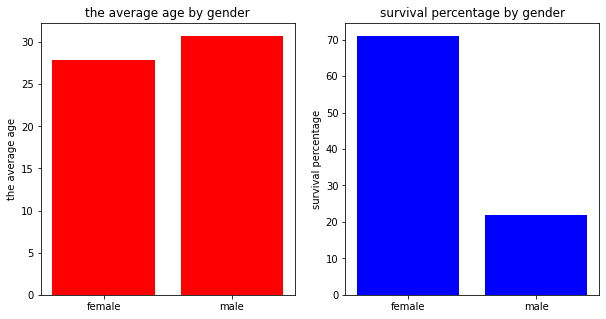

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(df_2_plots.index, df_2_plots["Age"], color="red")
plt.ylabel("the average age")
plt.title("the average age by gender")

plt.subplot(1,2,2)
plt.bar(df_2_plots.index, df_2_plots["Survival Percentage"], color="blue")
plt.ylabel("survival percentage")
plt.title("survival percentage by gender")
plt.show()

**1-Conclusions:** This data frame contains data from the titanic ship that sank in 1912. 

When we look at the charts, the average age of male passengers is higher than female passengers. However, it seems that the survival percentage of male passengers is lower than female passengers. This may be because male passengers are more involved in rescue efforts. 


In [9]:
df = pd.read_csv("/content/drive/MyDrive/master.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


**2-Practice:** Find a dataframe and use a line chart with this.

In [10]:
df_2 = df.loc[lambda df: df["country"] == "Turkey"]
df_3 = df_2.groupby(by="year").sum()
df_3

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
2009,1050,65962419,21.29,0.000,117276
2010,1524,66975131,31.69,8.856,138300
2011,1148,68034357,23.07,9.012,146844
2012,1450,68976439,28.40,9.072,152052
2013,1810,69880352,35.42,9.108,163236
2014,1617,70931420,30.83,9.132,158040
2015,1532,71880464,28.47,0.000,143532


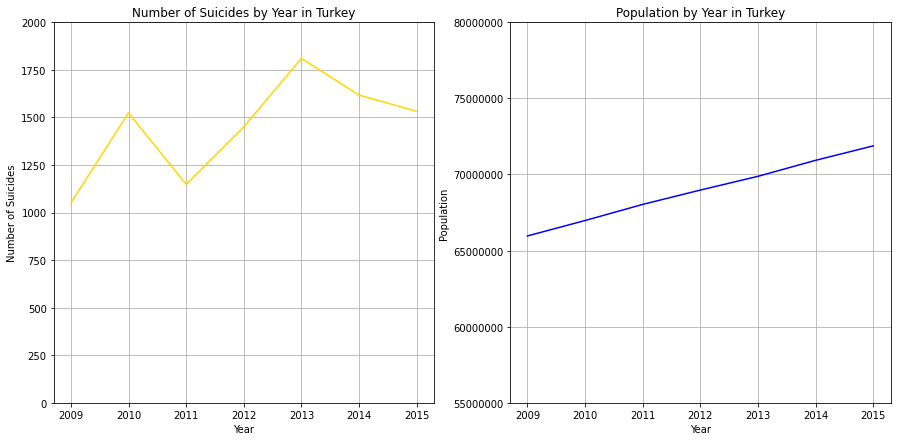

In [47]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(df_3["suicides_no"], color="gold")
plt.ylim([0,2000])
plt.ylabel("Number of Suicides")
plt.xlabel("Year")
plt.title("Number of Suicides by Year in Turkey")
plt.grid()

plt.subplot(1,2,2)
plt.plot(df_3["population"], color="blue")
plt.ylim([55000000, 80000000])
plt.ticklabel_format(style = 'plain')
plt.ylabel("Population")
plt.xlabel("Year")
plt.title("Population by Year in Turkey")
plt.grid()
plt.show()



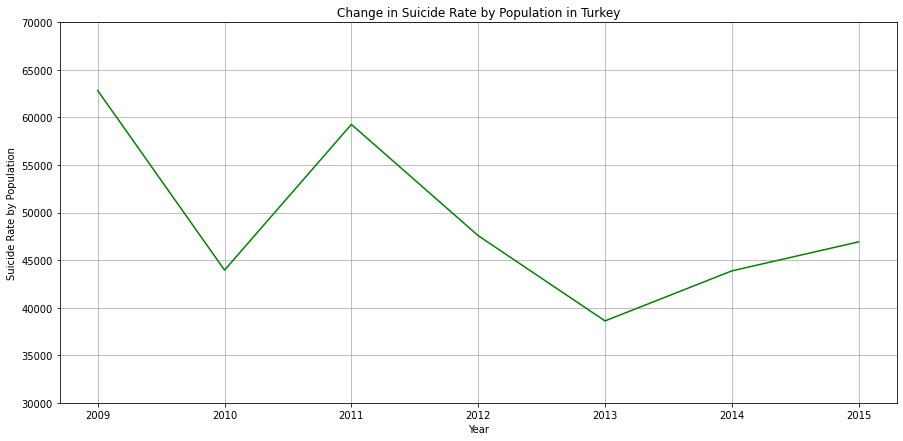

In [50]:
plt.figure(figsize=(15,7))
plt.plot((df_3["population"] / df_3["suicides_no"]), color="green")
plt.ylim([30000,70000])
plt.ylabel("Suicide Rate by Population")
plt.xlabel("Year")
plt.title("Change in Suicide Rate by Population in Turkey")
plt.grid()

**2-Conclusions:** This data frame includes suicide data from 1985 to 2015. We've worked on Turkey's rates.

As seen in the graphs, the number of suicides increased from 2009 to 2010. Although this number decreased slightly in 2011, the number of suicides increased until 2013. It decreased from 2013 to 2015. However, in general, we can say that the suicide rate increased from 2009 to 2015.

Population in Turkey regularly increased from 2009 to 2015.

In order to say anything about suicide in this rapidly changing population, we must calculate the ratio of the number of suicides to the population. This ratio gives us how many people one suicide corresponds to. According to the table, 2013 was the year with the highest suicide rate. In 2013, one out of 38 thousand people committed suicide. The lowest year was 2009. From 2009 to 2015, it can be said that the case of suicide has increased in general.





